In [93]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [14]:
#Load the dataset
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',header=None,names=('label','message'))

In [15]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
print(len(messages))

5572


In [26]:
(messages['label'].value_counts()/len(messages['label']))*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [27]:
##EDA
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

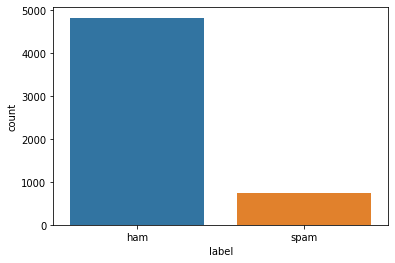

In [40]:
sns.countplot(messages['label'])

In [42]:
messages['msg_len']=messages['message'].apply(lambda x:len(x))

In [47]:
messages[messages['msg_len']==2].head()  ##to check msg_len is working

,label,message,msg_len
1925,ham,Ok,2
3051,ham,Ok,2
4498,ham,Ok,2
5357,ham,Ok,2


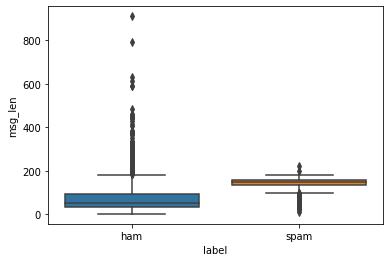

In [53]:
sns.boxplot(messages['label'],messages['msg_len'])

In [94]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [95]:
def clean_text(text):
    no_punc=[char for char in text if char not in string.punctuation]
    no_punc="".join(no_punc)
    no_num=re.sub(r'\d+','',no_punc)
    clean=[wordnet.lemmatize(word.lower()) for word in no_num.split() if word.lower() not in stopwords.words('english')]
    clean=' '.join(clean)
    return clean

In [96]:
messages['tokens']=messages['message'].apply(clean_text)

In [97]:
messages['tokens']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
                              ...                        
5567    nd time tried contact u u £ pound prize claim ...
5568                          ü b going esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: tokens, Length: 5572, dtype: object

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(messages['tokens']).toarray()

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,messages['label'],test_size=0.2)

In [100]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
model=classifier.fit(X_train,y_train)

In [101]:
prediction=model.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [103]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       976
        spam       0.85      0.94      0.89       139

    accuracy                           0.97      1115
   macro avg       0.92      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [104]:
accuracy_score(y_test,prediction)

0.9713004484304932

## Method2 TF-IDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(messages['tokens']).toarray()

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,messages['label'],test_size=0.2)

In [109]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
model=classifier.fit(X_train,y_train)

In [110]:
prediction=model.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [112]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       961
        spam       1.00      0.76      0.86       154

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [113]:
print(confusion_matrix(y_test,prediction))

[[961   0]
 [ 37 117]]
